In [79]:
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from matplotlib import style

In [136]:
iris = datasets.load_iris()

In [ ]:
iris.feature_names

In [23]:
type(iris)

sklearn.utils.Bunch

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
train = iris.data

In [137]:
classes = iris.target
train[:20] # visualizando 20 linhas

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [33]:
classes[:] # visualizando os dados de classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

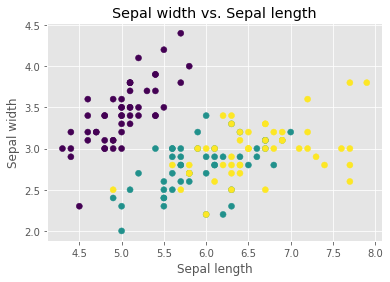

In [116]:
%matplotlib inline
style.use("ggplot")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Sepal width vs. Sepal length")
plt.scatter(train[:,0], train[:,1], c = classes)
plt.show()

In [62]:
# 80% dos dados para treino e 20% para teste
len(train[:-30]), len(classes[:-30])

(120, 120)

In [82]:
# treinando o algoritmo
model = svm.SVC().fit(train[:-30], classes[:-30])
model

SVC()

In [84]:
# criando um array com os dados de teste
# 20% dos dados que não foram testados
test = train[-30:]

In [90]:
# predizendo valores com a porção de dados de teste
model.predict(test) 

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [89]:
# criando um array com as classes dos dados de teste
classes_test = classes[-30:] # classes reais
classes_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Visualizando os resultados de classificação

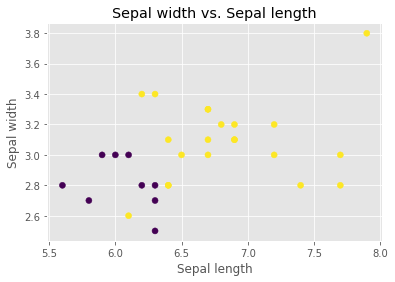

In [120]:
style.use("ggplot")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Sepal width vs. Sepal length")
plt.scatter(train[-30:,0], train[-30:,1], c = model.predict(test))
plt.show()

# pontos roxos representam predições erradas
# pontos amarelos representam predições certas

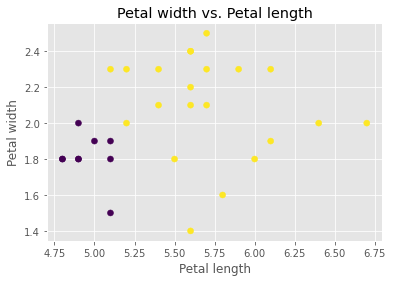

In [121]:
style.use("ggplot")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Petal width vs. Petal length")
plt.scatter(train[-30:,2], train[-30:,3], c = model.predict(test))
plt.show()

# pontos roxos representam predições erradas
# pontos amarelos representam predições certas

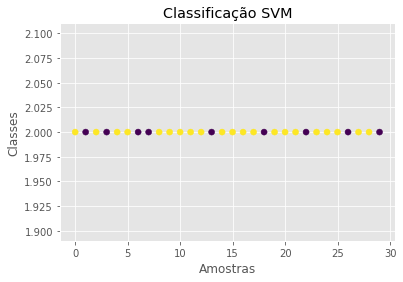

In [123]:
style.use("ggplot")

plt.xlabel("Amostras")
plt.ylabel("Classes")
plt.title("Classificação SVM")
plt.scatter(range(len(classes_test)), classes_test, c = model.predict(test))
plt.show()

# gráfico de instâncias e predição

Matriz de confusão

In [125]:
print(pd.crosstab(classes_test, model.predict(test), rownames = ["Real"], colnames = ["Predito"], margins = True), "")

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


Cross validation

Essa técnica divide o banco de dados em partes para fazer a validação do modelo com todos os dados

In [132]:
# função que retorna a acurácia após fazer uma validação cruzada

def acuracia(clf, x, y):
    results = cross_val_predict(clf, x, y, cv = 10)
    return metrics.accuracy_score(y, results)

# clf é classificador
# x é os dados de treino
# y são as classes
# cross_val_predict faz a validação cruzada

In [131]:
acuracia(model, train, classes)

# 97% de acurácia

0.9733333333333334

Métricas de avaliação do modelo

In [135]:
# imprime as seguintes métricas: precisão, revocação e medida F1

results = cross_val_predict(model, train, classes, cv = 10)
value_classes = [0, 1, 2]
print(metrics.classification_report(classes, results, value_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



C:\Users\barba\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
